## Application Flow

Before proceeding with the algorithm, let’s first discuss the lifecycle of any machine learning model. This diagram explains the creation of a Machine Learning model from scratch and then taking the same model further with hyperparameter tuning to increase its accuracy, deciding the deployment strategies for that model and once deployed setting up the logging and monitoring frameworks to generate reports and dashboards based on the client requirements. 
A typical lifecycle diagram for a machine learning model looks like:

<img src="MLApplicationFlow_bold.PNG" width= "300">

## Boosting
Boosting is an ensemble approach(meaning it involves several trees) that starts from a weaker decision and keeps on building the models such that the final prediction is the weighted sum of all the weaker decision-makers.
The weights are assigned based on the performance of an individual tree.

<img src= "boosting_basic.png" alt='boosting' style="width: 400px;">


Ensemble parameters are calculated in **stagewise way** which means that while calculating the subsequent weight, the learning from the previous tree is considered as well.


### Weak classifier - why tree?
First what is a weak classifier?
**Weak classifier** -  *slightly better* than random guessing.

Any algorithm could have been used as a base for the boosting technique, but the reason for choosing trees are:

#### Pro's
- computational scalability,
- handles missing values,
- robust to outliers,
- does not require feature scaling,
- can deal with irrelevant inputs,
- interpretable (if small),
- handles mixed predictors as well (quantitive and qualitative)

#### Con's
- inability to extract a linear combination of features
- high variance leading to a small computational power

And that’s where boosting comes into the picture. It minimises the variance by taking into consideration the results from various trees.


In every machine learning model, the training objective is a sum of a loss function $L$ and regularisation $\Omega$:

$$
obj = L + \Omega
$$

The loss function controls the predictive power of an algorithm and the regularisation term controls its simplicity.

There are several algorithms which use boosting. A few are discussed here.

### Ada Boost (Adaptive Boosting)
The steps to implement the Ada Boost algorithm using the decision trees are as follows:

**Algorithm**:

Assume that the number of training samples is denoted by $N$, and the number of iterations (created trees) is $M$. Notice that possible class outputs are $Y=\{-1,1\}$

1. Initialize the observation weights  $w_i=\frac{1}{N}$ where $i = 1,2, \dots, N$ for all the samples.
2. For $m=1$ to $M$:
    - fit a classifier $G_m(x)$ to the training data using weights $w_i$,
    - compute $err_m = \frac{\sum_{i=1}^{N} w_i I (y_i \neq G_m(x))}{\sum_{i=1}^{N}w_i}$,
    - compute $\alpha_m = \frac {1}{2} \log (\frac{(1-err_m)}{err_m})$. This is the contribution of that tree to the final result.
    - calculate the new weights using the formula:
    
    $w_i \leftarrow w_i \cdot \exp [\alpha_m \cdot I (y_i \neq G_m(x)]$, where $i = 1,2, \dots, N$
- Normalize the new sample  weights so that their sum is 1.
- Construct the next tree using the new weights


 3. At the end, compare the summation of results from all the trees and the final result is either the one with the highest sum(for regression) or it is the class which has the most weighted voted average(for classification).

       Output $G_m(x) = argmax [\sum_{m=1}^{M} \alpha_m G_m(x)]$ (Regression)

       Output $G_m(x) = sigm [\sum_{m=1}^{M} \alpha_m G_m(x)]$ (Classification)


**Example**

For understanding this algorithm, we'll use the following simple dataset for heart  patient prediction.

In [22]:
import pandas as pd
heart_data= pd.read_csv('heart_disease.csv')
heart_data

,Is Chest Pain Present,Are any arteries blocked,Weight of the person,Is Heart Patient
0,YES,YES,205,YES
1,NO,YES,180,YES
2,YES,NO,210,YES
3,YES,YES,167,YES
4,NO,YES,156,NO
5,NO,YES,125,NO
6,YES,NO,168,NO
7,YES,YES,172,NO


- There are a total of 8 rows in our dataset. Hence, we’ll initialize the sample weights($w=\frac {1}{N}$) as 1/8 in the beginning. And, at the beginning, all the samples are equally important.

<img src='sw1.PNG' width=”500”>

- We’ll consider the individual columns to create weak decision-makers as shown below and then try to figure out what are the correct and incorrect predictions based on that column.

<img src='cp1.PNG' width=”200”>

<img src='ba1.PNG' width=”200”>

<img src='bw1.PNG' width=”200”>

- We’ll now calculate the Gini index of the individual stumps using the formula

     G.I= $\sum (weight of the decision)*(1-(p^2+(1-p)^2))$

        G.I for chest pain tree= 0.47
        G.I for blocked arteries tree= 0.5
        G.I for body-weight tree= 0.2
        
        And, we select the tree with the lowest Gini Index. This will be the first decision-maker for our model.

- Now, we’ll calculate the contribution of this tree(stump) to our final decision using the formula:

Contribution= $½(log (1-total error)/total error)$

    As this stump classified only one data incorrectly out of the 8, hence the total error is 1/8.

    Putting this into the formula we get contribution= 0.97
    
- We’ll now calculate the new weights using the formula:

1. Increase the sample weight for incorrectly classified datapoints
    New weight= old weight*e^ contribution= 1/8* e^0.97=0.33
1. Decrease the sample weight for incorrectly classified datapoints
   New weight= old weight*e^- contribution= 1/8* e^-0.97=0.05

- Populate the new weights as shown below:

     <img src='nsw1.PNG' width=”300”>

- Normalize the sample weights: If we add all the new sample weights, we get 0.68. Hence, for normalization we divide all the sample weights by 0.68 and then create normalized sample weights as shown below: 

     <img src='normalized_wt.PNG' width=”200”>

       These new normalized weights will act as the sample weights for the next iteration.

- Then we create new trees which consider the dataset which was prepared using the new sample weights.

- Suppose, m trees(stumps) are classifying a person as a heart patient and n trees(stumps) are classifying a person as a healthy one, then the contribution of m and n trees are added separately and whichever has the higher value, the person is classified as that. 

_For example, if the contribution of m trees is 1.2 and the contribution of n trees is 0.5 then the final result will go in the favour of m trees and the person will be classified as a heart patient._


### Gradient Boosted Trees
file:///home/suman/Pictures/Screenshot%20from%202022-04-06%2007-30-22.png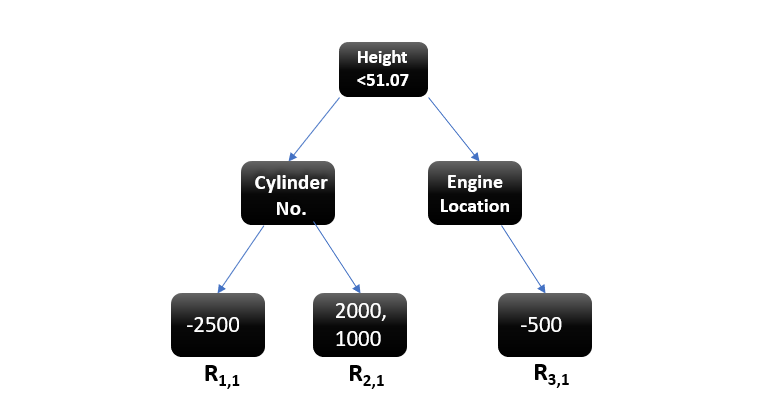
*Gradient Boosted Trees* use decision trees as estimators. It can work with different loss functions (regression, classification, risk modelling etc.), evaluate it's gradient and approximates it with a simple tree (stage-wisely, that minimizes the overall error).

AdaBoost is a special case of Gradient Boosted Tree that uses exponential loss function.

**The Algorithm:**

- Calculate the average of the label column as initially this average shall minimise the total error.
- Calculate the pseudo residuals.
       Pseudo residual= actual label- the predicted result (which is average in the first iteration)
  Mathematically,
  
     derivative of the pseudo residual=$(\frac {\delta L(y_i,f(x_i))}{\delta (f(x_i))})$
     
     where, L is the loss function.
                          
               
     Here, the gradient of the error term is getting calculated as the goal is to minimize the error. Hence the name gradient boosted trees
- create a tree to predict the pseudo residuals instead  of a tree to predict for the actual column values.
- new result= previous result+learning rate* residual 
   
   Mathematically, 
     $ F_1(x)= F_0(x)+ \nu \sum \gamma $
     
 where  $ \nu $ is the learning rate and $ \gamma $ is the residual

Repeat these steps until the residual stops decreasing


file:///home/suman/Pictures/1.png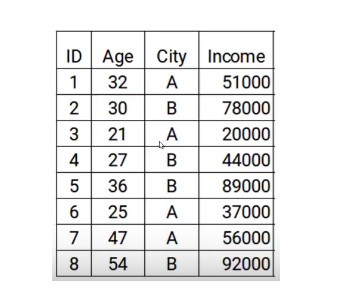
file:///home/suman/Pictures/2.png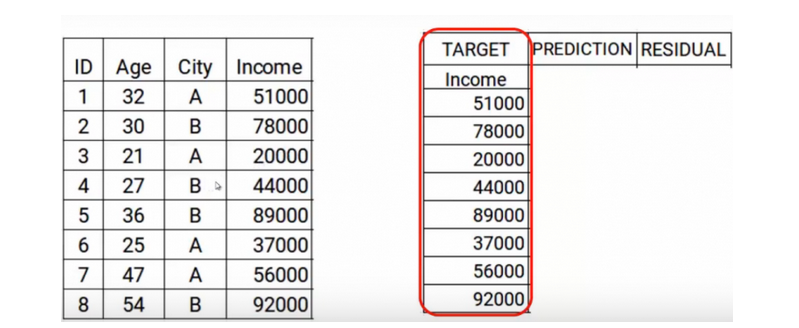
file:///home/suman/Pictures/3.png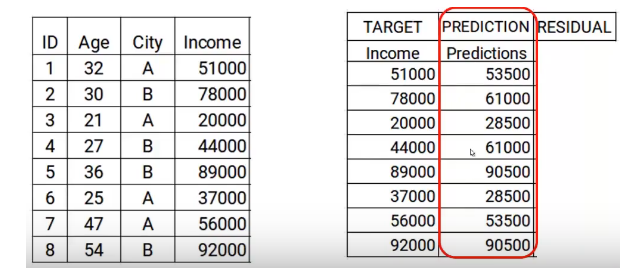
file:///home/suman/Pictures/4.png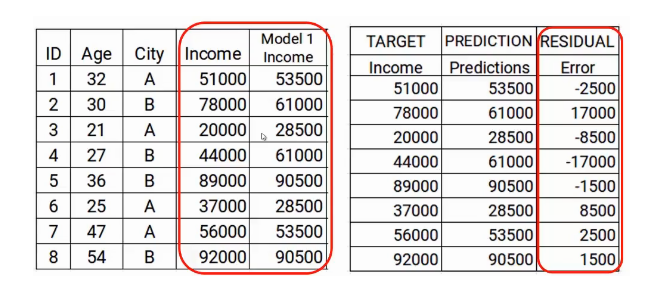
file:///home/suman/Pictures/5.png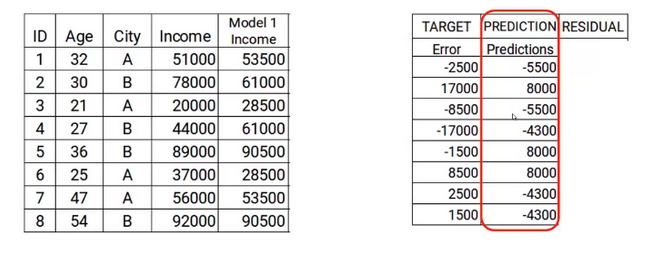
file:///home/suman/Pictures/6.png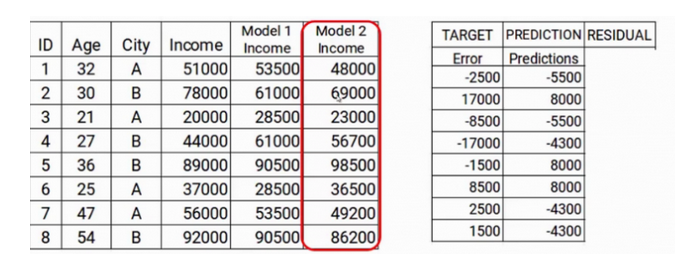

#### Example

For understanding this algorithm we'll use the following simple dataset for weight prediction

In [26]:
import pandas as pd
weight_data= pd.read_csv('weights.csv')
weight_data

,Person Height(in metres),Person Favorite Colour,Person Gender,Person Weight (in Kg)
0,1.6,Blue,Male,88
1,1.6,Green,Female,76
2,1.5,Blue,Female,56
3,1.8,Red,Male,73
4,1.5,Green,Male,77
5,1.4,Blue,Female,57


- For the first iteration, calculate the average of the target column(weight here) as it minimizes the residual initially.

Average=(88+76+56+73+77+57)/6=  71.2

- We consider this as the first prediction and then we’ll calculate the residual which is the difference between the predicted and the actual value as shown below:

<img src='pseudo_residuals1.PNG' width=”300”>
- Now we build a tree to predict the residuals as shown below:
<img src='residual_tree1.PNG' width=”300”>

We are only building here till a limited depth just for simplicity. As you can see, some leaves have more than one residuals. For those, we’ll calculate the average and the final tree will look like:
<img src='average_residual_tree.PNG' width=”300”>
- Now for prediction, we use the formula

                        New value= old value+learning rate * residual
If we consider the learning rate as 0.1, the result becomes.

                        New value=  71.2+0.1*16.8= 72.9 (for the first row).
    Similarly the new predictions for all the rows is calculated.
                        
- The above steps are repeated until there is no significant improvement in residuals.
- The final result is given by
                
                Final Value= First Prediction+learning rate* 1st residual+ learning rate* 2nd residual+ and so on


file:///home/suman/Pictures/1.png

### XGBoost
XGBoost improves the gradient boosting method even further.
> **XGBoost** (*extreme gradient boosting*) regularises data better than normal gradient boosted Trees.

It was developed by Tianqi Chen in C++ but now has interfaces for Python, R, Julia.

XGBoost's objective function is the sum of loss function evaluated over all the predictions and a regularisation function for all predictors ($j$ trees). In the formula $f_j$ means a prediction coming from the $j^th$ tree.

$$
obj(\theta) = \sum_{i}^{n} l(y_i - \hat{y_i}) +  \sum_{j=1}^{j} \Omega (f_j)
$$

Loss function depends on the task being performed (classification, regression, etc.) and a regularization term is described by the following equation:

$$
\Omega(f) = \gamma T + \frac{1}{2} \lambda \sum_{j=1}^{T}w_j^2
$$

First part ($\gamma T$) is responsible for controlling the overall number of created leaves, and the second term ($\frac{1}{2} \lambda \sum_{j=1}^{T}w_j^2$) watches over the scores.


**Mathematics Involved**
Unlike the other tree-building algorithms, XGBoost doesn’t use entropy or Gini indices. Instead, it utilises gradient (the error term) and hessian for creating the trees. Hessian for a Regression problem is the *number of residuals* and for a classification problem. Mathematically, Hessian is a second order derivative of the loss at the current estimate given as:

<img src="hessian.PNG" width="300">

where **L** is the loss function. 

- Initialise the tree with only one leaf.
- compute the similarity using the formula
$$
Similarity= \frac {Gradient^2}{ hessian +\lambda}
$$
Where $\lambda $ is the regularisation term.
- Now for splitting data into a tree form, calculate
$$
Gain=  left similarity+right similarity-similarity for root
$$ 
- For tree pruning, the parameter $ \gamma$ is used. The algorithm starts from the lowest level of the tree and then starts pruning based on the value of $\gamma$.


 If $Gain- \gamma < 0$, remove that branch. Else, keep the branch 
 
- Learning is done using the equation
$$
New Value= old Value+ \eta * prediction
$$

where $\eta$ is the learning rate


### Python Implementation

**Problem Statement**:
The Pima Indians Diabetes Dataset involves predicting the onset of diabetes within 5 years in Pima Indians given medical details.
It is a binary (2-class) classification problem. The number of observations for each class is not balanced. There are 768 observations with 8 input variables and 1 output variable. Missing values are believed to be encoded with zero values. The variable names are as follows:
1.	Number of times pregnant.
2.	Plasma glucose concentration 2 hours in an oral glucose tolerance test.
3.	Diastolic blood pressure (mm Hg).
4.	Triceps skinfold thickness (mm).
5.	2-Hour serum insulin (mu U/ml).
6.	Body mass index (weight in kg/(height in m)^2).
7.	Diabetes pedigree function.
8.	Age (years).
9.	Is Diabetic (0 or 1).

In [1]:
import pandas as pd
import numpy as np
import xgboost as xgb
import pickle
from sklearn import datasets
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

ModuleNotFoundError: No module named 'xgboost'

In [38]:
# reading the features and the labels
data= pd.read_csv('pima-indians-diabetes.csv')

In [39]:
data.head()

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure (mm Hg),Triceps skinfold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age,Is Diabetic
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [40]:
data.columns

Index(['Number of times pregnant', 'Plasma glucose concentration',
       'Diastolic blood pressure (mm Hg)', 'Triceps skinfold thickness (mm)',
       '2-Hour serum insulin (mu U/ml)',
       'Body mass index (weight in kg/(height in m)^2)',
       'Diabetes pedigree function', 'Age', 'Is Diabetic'],
      dtype='object')

In [41]:
cols = ['Plasma glucose concentration',
       'Diastolic blood pressure (mm Hg)', 'Triceps skinfold thickness (mm)',
       '2-Hour serum insulin (mu U/ml)',
       'Body mass index (weight in kg/(height in m)^2)',
       'Diabetes pedigree function', 'Age']

In [42]:
# as mentioned in the data description, the missing values have been replaced by zeroes. So, we are replacing zeroes with nan
for col in cols:
    data[col]=data[col].replace(0, np.nan)

In [43]:
# checking for missing values
data.isna().sum()

Number of times pregnant                            0
Plasma glucose concentration                        5
Diastolic blood pressure (mm Hg)                   35
Triceps skinfold thickness (mm)                   227
2-Hour serum insulin (mu U/ml)                    374
Body mass index (weight in kg/(height in m)^2)     11
Diabetes pedigree function                          0
Age                                                 0
Is Diabetic                                         0
dtype: int64

In [44]:
# imputing the missing values
data['Plasma glucose concentration']=data['Plasma glucose concentration'].fillna(data['Plasma glucose concentration'].mode()[0])
data['Diastolic blood pressure (mm Hg)']=data['Diastolic blood pressure (mm Hg)'].fillna(data['Diastolic blood pressure (mm Hg)'].mode()[0])
data['Triceps skinfold thickness (mm)']=data['Triceps skinfold thickness (mm)'].fillna(data['Triceps skinfold thickness (mm)'].mean())
data['2-Hour serum insulin (mu U/ml)']=data['2-Hour serum insulin (mu U/ml)'].fillna(data['2-Hour serum insulin (mu U/ml)'].mean())
data['Body mass index (weight in kg/(height in m)^2)']=data['Body mass index (weight in kg/(height in m)^2)'].fillna(data['Body mass index (weight in kg/(height in m)^2)'].mean())


In [45]:
# checking for missing values after imputation
data.isna().sum()

Number of times pregnant                          0
Plasma glucose concentration                      0
Diastolic blood pressure (mm Hg)                  0
Triceps skinfold thickness (mm)                   0
2-Hour serum insulin (mu U/ml)                    0
Body mass index (weight in kg/(height in m)^2)    0
Diabetes pedigree function                        0
Age                                               0
Is Diabetic                                       0
dtype: int64

In [46]:
#Separating the feature and the Label columns 
x=data.drop(labels='Is Diabetic', axis=1)
y= data['Is Diabetic']

In [47]:
x.head()

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure (mm Hg),Triceps skinfold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33


In [48]:
# as the datapoints differ a lot in magnitude, we'll scale them
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_data=scaler.fit_transform(x)

C:\Users\virat\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\virat\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [49]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(scaled_data,y,test_size=0.3,random_state=42)

In [50]:
# fit model no training data
model = XGBClassifier(objective='binary:logistic')
model.fit(train_x, train_y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [51]:
# cheking training accuracy
y_pred = model.predict(train_x)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(train_y,predictions)
accuracy

0.9050279329608939

In [52]:
# cheking initial test accuracy
y_pred = model.predict(test_x)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(test_y,predictions)
accuracy

0.7402597402597403

In [32]:
test_x[0]

array([ 0.63994726, -0.77251205, -1.18156252,  0.43784695,  0.40547846,
        0.22451019, -0.1264714 ,  0.83038113])

In [ ]:
# Now to increae the accuracy of the model, we'll do hyperparameter tuning using grid search


In [53]:
from sklearn.model_selection import GridSearchCV

In [74]:
param_grid={
   
    ' learning_rate':[1,0.5,0.1,0.01,0.001],
    'max_depth': [3,5,10,20],
    'n_estimators':[10,50,100,200]
    
}

In [75]:
grid= GridSearchCV(XGBClassifier(objective='binary:logistic'),param_grid, verbose=3)

In [76]:
grid.fit(train_x,train_y)

C:\Users\virat\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 80 candidates, totalling 240 fits
[CV]  learning_rate=1, max_depth=3, n_estimators=10 ..................
[CV]   learning_rate=1, max_depth=3, n_estimators=10, score=0.7777777777777778, total=   0.0s
[CV]  learning_rate=1, max_depth=3, n_estimators=10 ..................
[CV]   learning_rate=1, max_depth=3, n_estimators=10, score=0.770949720670391, total=   0.0s
[CV]  learning_rate=1, max_depth=3, n_estimators=10 ..................
[CV]   learning_rate=1, max_depth=3, n_estimators=10, score=0.7303370786516854, total=   0.0s
[CV]  learning_rate=1, max_depth=3, n_estimators=50 ..................
[CV]   learning_rate=1, max_depth=3, n_estimators=50, score=0.7888888888888889, total=   0.0s
[CV]  learning_rate=1, max_depth=3, n_estimators=50 ..................
[CV]   learning_rate=1, max_depth=3, n_estimators=50, score=0.776536312849162, total=   0.0s
[CV]  learning_rate=1, max_depth=3, n_estimators=50 ..................
[CV]   learning_rate=1, max_depth=3, n_estim

[CV]   learning_rate=0.5, max_depth=3, n_estimators=10, score=0.7303370786516854, total=   0.0s
[CV]  learning_rate=0.5, max_depth=3, n_estimators=50 ................
[CV]   learning_rate=0.5, max_depth=3, n_estimators=50, score=0.7888888888888889, total=   0.0s
[CV]  learning_rate=0.5, max_depth=3, n_estimators=50 ................
[CV]   learning_rate=0.5, max_depth=3, n_estimators=50, score=0.776536312849162, total=   0.0s
[CV]  learning_rate=0.5, max_depth=3, n_estimators=50 ................
[CV]   learning_rate=0.5, max_depth=3, n_estimators=50, score=0.7584269662921348, total=   0.0s
[CV]  learning_rate=0.5, max_depth=3, n_estimators=100 ...............
[CV]   learning_rate=0.5, max_depth=3, n_estimators=100, score=0.7888888888888889, total=   0.0s
[CV]  learning_rate=0.5, max_depth=3, n_estimators=100 ...............
[CV]   learning_rate=0.5, max_depth=3, n_estimators=100, score=0.776536312849162, total=   0.0s
[CV]  learning_rate=0.5, max_depth=3, n_estimators=100 ..............

[CV]   learning_rate=0.1, max_depth=3, n_estimators=100, score=0.7640449438202247, total=   0.0s
[CV]  learning_rate=0.1, max_depth=3, n_estimators=200 ...............
[CV]   learning_rate=0.1, max_depth=3, n_estimators=200, score=0.7666666666666667, total=   0.0s
[CV]  learning_rate=0.1, max_depth=3, n_estimators=200 ...............
[CV]   learning_rate=0.1, max_depth=3, n_estimators=200, score=0.7653631284916201, total=   0.0s
[CV]  learning_rate=0.1, max_depth=3, n_estimators=200 ...............
[CV]   learning_rate=0.1, max_depth=3, n_estimators=200, score=0.7584269662921348, total=   0.0s
[CV]  learning_rate=0.1, max_depth=5, n_estimators=10 ................
[CV]   learning_rate=0.1, max_depth=5, n_estimators=10, score=0.7833333333333333, total=   0.0s
[CV]  learning_rate=0.1, max_depth=5, n_estimators=10 ................
[CV]   learning_rate=0.1, max_depth=5, n_estimators=10, score=0.7486033519553073, total=   0.0s
[CV]  learning_rate=0.1, max_depth=5, n_estimators=10 ...........

[CV]   learning_rate=0.01, max_depth=3, n_estimators=200, score=0.7584269662921348, total=   0.0s
[CV]  learning_rate=0.01, max_depth=5, n_estimators=10 ...............
[CV]   learning_rate=0.01, max_depth=5, n_estimators=10, score=0.7833333333333333, total=   0.0s
[CV]  learning_rate=0.01, max_depth=5, n_estimators=10 ...............
[CV]   learning_rate=0.01, max_depth=5, n_estimators=10, score=0.7486033519553073, total=   0.0s
[CV]  learning_rate=0.01, max_depth=5, n_estimators=10 ...............
[CV]   learning_rate=0.01, max_depth=5, n_estimators=10, score=0.7247191011235955, total=   0.0s
[CV]  learning_rate=0.01, max_depth=5, n_estimators=50 ...............
[CV]   learning_rate=0.01, max_depth=5, n_estimators=50, score=0.7666666666666667, total=   0.0s
[CV]  learning_rate=0.01, max_depth=5, n_estimators=50 ...............
[CV]   learning_rate=0.01, max_depth=5, n_estimators=50, score=0.7877094972067039, total=   0.0s
[CV]  learning_rate=0.01, max_depth=5, n_estimators=50 .......

[CV]  learning_rate=0.001, max_depth=5, n_estimators=100 .............
[CV]   learning_rate=0.001, max_depth=5, n_estimators=100, score=0.770949720670391, total=   0.0s
[CV]  learning_rate=0.001, max_depth=5, n_estimators=100 .............
[CV]   learning_rate=0.001, max_depth=5, n_estimators=100, score=0.7865168539325843, total=   0.0s
[CV]  learning_rate=0.001, max_depth=5, n_estimators=200 .............
[CV]   learning_rate=0.001, max_depth=5, n_estimators=200, score=0.7388888888888889, total=   0.0s
[CV]  learning_rate=0.001, max_depth=5, n_estimators=200 .............
[CV]   learning_rate=0.001, max_depth=5, n_estimators=200, score=0.7486033519553073, total=   0.0s
[CV]  learning_rate=0.001, max_depth=5, n_estimators=200 .............
[CV]   learning_rate=0.001, max_depth=5, n_estimators=200, score=0.7640449438202247, total=   0.0s
[CV]  learning_rate=0.001, max_depth=10, n_estimators=10 .............
[CV]   learning_rate=0.001, max_depth=10, n_estimators=10, score=0.7333333333333

[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:   15.4s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={' learning_rate': [1, 0.5, 0.1, 0.01, 0.001], 'max_depth': [3, 5, 10, 20], 'n_estimators': [10, 50, 100, 200]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [77]:
# To  find the parameters givingmaximum accuracy
grid.best_params_

{' learning_rate': 1, 'max_depth': 5, 'n_estimators': 50}

In [88]:
# Create new model using the same parameters
new_model=XGBClassifier(learning_rate= 1, max_depth= 5, n_estimators= 50)
new_model.fit(train_x, train_y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=1,
       max_delta_step=0, max_depth=5, min_child_weight=1, missing=None,
       n_estimators=50, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [89]:
y_pred_new = new_model.predict(test_x)
predictions_new = [round(value) for value in y_pred_new]
accuracy_new = accuracy_score(test_y,predictions_new)
accuracy_new

0.7445887445887446

In [ ]:
# As we have increased the accuracy of the model, we'll save this model

In [90]:
filename = 'xgboost_model.pickle'
pickle.dump(new_model, open(filename, 'wb'))

loaded_model = pickle.load(open(filename, 'rb'))

In [96]:
# we'll save the scaler object as well for prediction
filename_scaler = 'scaler_model.pickle'
pickle.dump(scaler, open(filename_scaler, 'wb'))

scaler_model = pickle.load(open(filename_scaler, 'rb'))

In [95]:
# Trying a random prediction
d=scaler_model.transform([[6,148,72,35,80,33.6,0.627,50]])
pred=loaded_model.predict(d)
print('This data belongs to class :',pred[0])

This data belongs to class : 1


**The main advantages:**
- out of the box feature of appropriate bias-variance trade-off,
- great computation speed as it utilises parallel computing and cache optimization,
- uses hardware optimization,
- works well even if the features are correlated
- robust even if there is noise for classification problem
- the facility of early stopping
- the package is evolving, i.e., new features are being added.

### Cloud Deployment

Once the training is completed, we need to expose the trained model as an API for the user to consume it. For prediction, the saved model is loaded first and then the predictions are done using it. If the web app works fine, the same app is deployed to the cloud platform.
The flow for that can be shown as:

<img src="testing_pipeline.PNG">

We'll deploy this model to the Google Cloud Platform.

**Pre-requisites for Cloud Deployment:**
* Basic knowledge of flask framework.
* Any Python IDE installed(we are using PyCharm).
* A Google Cloud Platform account.
* Basic understanding of HTML.


**The Flask App**
As we’ll expose the created model as a web API to be consumed by the client/client APIs, we’d do it using the flask framework. 

* Create the project structure, as shown below:
<img src="project_structure.PNG">



The contents of **main.py** are:

#### Deployment to G-cloud:
* Go to https://cloud.google.com/ and create an account if already haven’t created one. Then go to the console of your account.
* Go to IAM and admin(highlighted) and click manage resources.
  <img src="manage_resources.PNG" >
            
* Click _CREATE PROJECT_ to create a new project for deployment.
* Once the project gets created, select _App Engine_ and select _Dashboard_.
    <img src="dashboard.PNG" >
   
* Go to https://dl.google.com/dl/cloudsdk/channels/rapid/GoogleCloudSDKInstaller.exe to download the google cloud SDK to your machine.
* Click _Start Tutorial_ on the screen and select _Python app_ and click start.
<img src="get_started.PNG" width="300" >
* Check whether the correct project name is displayed and then click next.

* Create a file **app.yaml** and put  _runtime: python37_ in that file as shown
<img src="app_yaml.PNG">

* Create a **requirements.txt** file by opening the command prompt/anaconda prompt, navigate to the project folder and enter the command **pip freeze > requirements.txt**

It is recommended to use separate environments for different projects.

The contents of **requirements.txt** are:

certifi==2019.11.28

Click==7.0

Flask==1.1.1

Flask-Cors==3.0.8

itsdangerous==1.1.0

Jinja2==2.10.3

joblib==0.14.1

MarkupSafe==1.1.1

numpy==1.18.0

scikit-learn==0.22.1

scipy==1.4.1

six==1.13.0

Werkzeug==0.16.0

wincertstore==0.2

xgboost==0.90


* Your python application file should be called ‘main.py’. It is a GCP specific requirement.
* Open gcloud shell , navigate to the project folder and enter the command gcloud init to initialise the gcloud context.
* It asks you to select from the list of available projects.

<img src="available_projects.PNG" width="300">

* Once the project name is selected, enter the command **gcloud app deploy app.yaml --project (project name)**
* After executing the above command, GCP will ask you to enter the region for your application. Choose the appropriate one.
<img src="region_selection.PNG" width="300">

* GCP will ask for the services to be deployed. Enter ‘y’ to deploy the services.
<img src="yes.PNG" width="300">

* And then it will give you the link for your app.
* To save money, go to settings and disable your app.
<img src="disable.PNG">


* The final app can be accessed using _Postman_ as shown below:
Final app screenshot:
<img src="final.PNG">